In [190]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Постановка задачи

Найти наилучшее среднеквадратичное приближение функции $$f(x) = x e^x,\quad x \in [a,b] = [0,2].$$

Приближение функции линейное, а в качестве пространств, из которых мы будем брать функцию $\varphi(x)$, будем брать гильбертовы пространства:
1. для наилучшего среднеквадратичного приближения непрерывно заданной функции $L_2[a,b]$;
2. для наилучшего среднеквадратичного приближения поточечно заданной функции $\mathbb R_2$ (евклидово со сферическйо нормой);

# Описание решения задачи

Пусть подпространство $\Phi$ порождено элементами $\varphi_0,\varphi_1,\ldots, \varphi_n$. Обозначим $\Phi_0$ --- элемент наилучшего приближения к $f$ в $\Phi$. Поскольку $\Phi_0 \in \Phi$, то он представим в виде линейной комбинации $$\Phi_0 = \sum_{i=0}^{n}c_i\varphi_i.$$
 Задача отыскания $\Phi_0$ равносильна отысканию коэффициентов $c_0,\ldots, c_n$ таких, чтобы выполнялось равенство $$(f-\Phi_0, \varphi) = 0\ \forall \varphi \in \Phi.$$
 Последнее равенство равносильно системе условий вида $$(f-\Phi_0, \varphi_j) = 0, j = 0,1,\ldots, n.$$
 Эти равенства представляют собой систему линейных алгебраических уравнений вида $$\begin{cases}
 	c_0(\varphi_0,\varphi_0) + \ldots + c_n(\varphi_n, \varphi_0) = (f,\varphi_0),\\
 	\vdots\\
 	c_0(\varphi_0,\varphi_n) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_n)
 \end{cases}$$
 
  Таким образом, для построения элемента наилучшего приближения в гильбертовом пространстве необходимо сделать два пункта
1. выбрать систему базисных элементов $\varphi_0,\ldots, \varphi_n$ подпространства $\Phi$;
2. составить и решить систему указанную выше.

## Условия решения задачи

Обусловимся тем, что в качестве базисной системы элементов $\{\varphi_i\}\subset \Phi$ будем брать $$1,x,x^2,\ldots, x^n \in L_2[0,2] \vee \mathbb R_2.$$ 
Эта система функций линейно независимая (ни одна линейная комбинация элементов из этой системы не даст в результате другой элемент системы).

В результате приближающий многочлен примет вид $$P(x) = c_nx^n + \ldots + c_1x + c_0,\quad c_i\in \mathbb R.$$

Также ограничимся выбором весовой функции $$p(x) = 1.$$

# Пространство $L_2[a,b]$

В пространстве $L_2[0,2]$ для отыскания коэффициентов приближающего многочлена $c_i$ необходимо найти решение системы 
$$\begin{cases}
 	c_0(\varphi_0,\varphi_0) + \ldots + c_n(\varphi_n, \varphi_0) = (f,\varphi_0),\\
 	\vdots\\
 	c_0(\varphi_0,\varphi_n) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_n)
 \end{cases}$$
В данном случае $$(\varphi_i, \varphi_j) = \int\limits_0^2 x^i x^j dx,\quad (f,\varphi_i) = \int\limits_0^2 f(x) x^i dx,\quad i,j = \overline{0,n}.$$

По заданным формулам составим систему и найдем ее решение. Возьмем многочлен $$P(x) = c_1 x + c_0.$$
Тогда, так как базис образуют две функции $1, x$, система будет состоять из двух уравнений. Найдем значения интегралов в этой системе:
$$(1, 1) = \int\limits_0^2 dx = 2,$$
$$(1,x) = \int\limits_0^2 x dx = 2,$$
$$(x,x) = \int\limits_0^2 x^2 dx = 8/3,$$
$$(xe^x,1) = \int\limits_0^2 xe^x dx = xe^x - e^x |_0^2 = 1+e^2 \approx 8.3891,$$
$$(xe^x,x) = \int\limits_0^2 xe^x dx = x^2e^x -2x e^x+2xe^x |_0^2 = 2e^2 - 2 \approx 12.778.$$
Система равна $$\begin{pmatrix} 2 & 2 & | & 1+e^2 \\ 2 & 8/3 & | & 2e^2 - 2 \end{pmatrix}$$
Найдем ее решение

In [191]:
a = np.array([[2, 2], [2, 8/3]])
b = np.array([1+np.e**2, 2*np.e**2 - 2])
c = np.linalg.solve(a,b)
print(c)

[-2.3890561   6.58358415]


С полученными коэффициентами составим многочлен и найдем значение среднеквадратичного отклонения $||f(x) - P(x)||^2$ при помощь Wolfram:
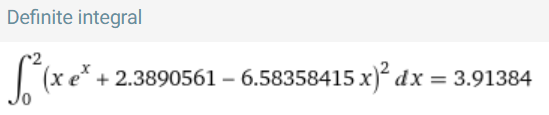

In [192]:
def P(c, x):
    P = 0
    for i in range(len(c)):
        P += x**i * c[i]
    return P

In [193]:
def f(x):
    return x * np.e**x

Построим график приближения

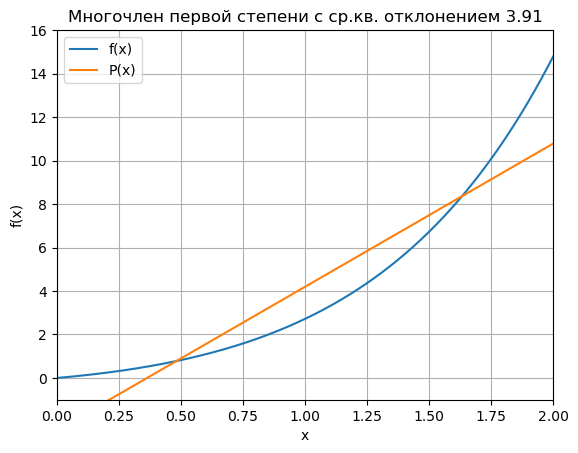

In [194]:
x = np.linspace(0, 2, 10000)
c1_d1 = c
fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, P(c1_d1, x), label='P(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 16)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.title('Многочлен первой степени с ср.кв. отклонением 3.91')
plt.grid()
plt.show()

Исходная функция на отрезке имеет более упругий вид, который не получится достичь с помощью прямой. Поэтому возьем многочлен второй степени $$P(x) = c_2x^2+ c_1x + c_0.$$
Теперь система уравнений будет третьего порядка и для нее нужно вычислить дополнительные значения интегралов, поскольку теперь базис образуют функции $1,x,x^2$:
$$(1, x^2) = \int\limits_0^2 x^2 dx = 8/3,$$
$$(x,x^2) = \int\limits_0^2 x^3 dx = 4,$$
$$(x^2,x^2) = \int\limits_0^2 x^4 dx = 32/5,$$
$$(xe^x,x^2) = \int\limits_0^2 x^3e^x dx = x^3e^x -3x^2e^x + 6xe^x-6e^x|_0^2 = 6+2e^2 \approx 20.778,$$
Система равна $$\begin{pmatrix} 2 & 2 & 8/3 & | & 1+e^2 \\ 2 & 8/3 & 4 & | & 2e^2 - 2 \\ 8/3 & 4 & 32/5 & | & 6+2e^2 \end{pmatrix}$$

In [195]:
a = np.array([[2, 2, 8/3], [2, 8/3, 4], [8/3, 4, 32/5]])
b = np.array([1+np.e**2, 2*np.e**2 - 2, 6+2*np.e**2])
c = np.linalg.solve(a,b)
print(c)

[ 0.66566341 -2.58057437  4.58207926]


С полученными коэффициентами составим многочлен и найдем значение среднеквадратичного отклонения $||f(x) - P(x)||^2$ при помощь Wolfram:
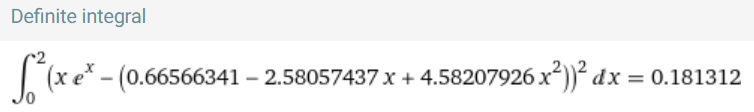

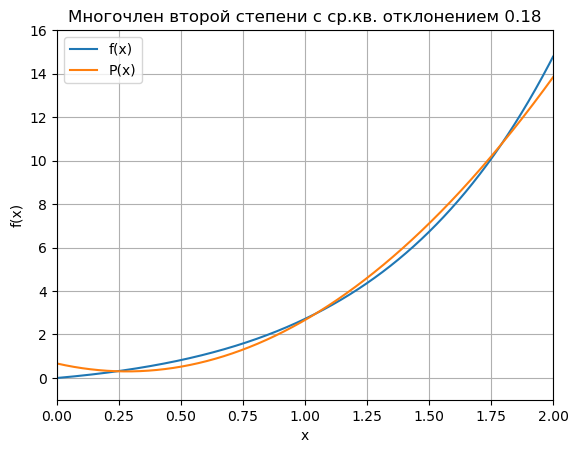

In [196]:
x = np.linspace(0, 2, 10000)
c1_d2 = c
fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, P(c1_d2, x), label='P(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 16)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.title('Многочлен второй степени с ср.кв. отклонением 0.18')
plt.grid()
plt.show()

Видно, что мы можем попытаться еще лучше приблизить функцию на этом отрезке. Возьем многочлен третьей степени $$P(x) = c_3x^3+c_2x^2+ c_1x + c_0.$$
Теперь система уравнений будет четвертого порядка и для нее нужно вычислить дополнительные значения интегралов, поскольку теперь базис образуют функции $1,x,x^2, x^3$:
$$(1, x^3) = \int\limits_0^2 x^3 dx = 4,$$
$$(x,x^3) = \int\limits_0^2 x^4 dx = 32/5,$$
$$(x^2,x^3) = \int\limits_0^2 x^5 dx = 64/6,$$
$$(x^3,x^3) = \int\limits_0^2 x^6 dx = 128/7,$$
$$(xe^x,x^3) = \int\limits_0^2 x^4e^x dx = e^x(x^4 - 4x^3+12x^2 - 24x + 24)|_0^2 = -24+8e^2 \approx 35.112,$$
Система равна $$\begin{pmatrix} 2 & 2 & 8/3 & 4 & | & 1+e^2 \\ 2 & 8/3 & 4 & 32/5 & | & 2e^2 - 2 \\ 8/3 & 4 & 32/5 & 64/6 & | & 6+2e^2 \\ 4 & 32/5 & 64/6 & 128/7 & | & -24+8e^2 \end{pmatrix}$$

In [197]:
a = np.array([[2, 2, 8/3, 4], [2, 8/3, 4, 32/5], [8/3, 4, 32/5, 64/6], [4, 32/5, 64/6, 128/7]])
b = np.array([1+np.e**2, 2*np.e**2 - 2, 6+2*np.e**2, -24+8*np.e**2])
c = np.linalg.solve(a,b)
print(c)

[-0.12147813  2.14227487 -1.32148229  1.96785385]


С полученными коэффициентами составим многочлен и найдем значение среднеквадратичного отклонения $||f(x) - P(x)||^2$ при помощь Wolfram:
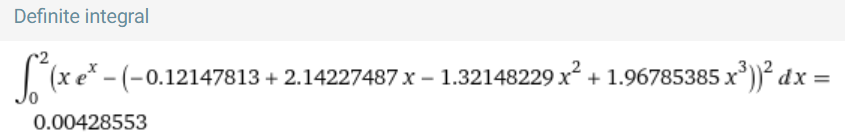

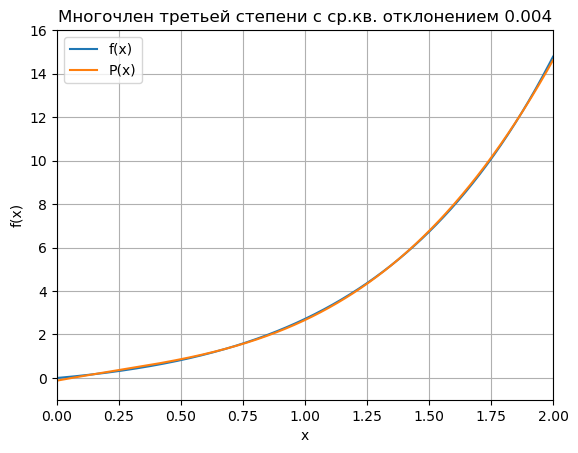

In [198]:
x = np.linspace(0, 2, 10000)
c1_d3 = c
fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, P(c1_d3, x), label='P(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 16)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.title('Многочлен третьей степени с ср.кв. отклонением 0.004')
plt.grid()
plt.show()

Полученное приближение имеет на отрезке достаточно малое среднеквадратичное отклонение, поэтому мы можем считать, что вместо исходной функции мы можем взять более простую кубическую функцию.

# Пространство $\mathbb R_2$

В пространстве $\mathbb R_2[0,2]$ для отыскания коэффициентов приближающего многочлена $c_i$ необходимо найти решение системы 
$$\begin{cases}
 	c_0(\varphi_0,\varphi_0) + \ldots + c_n(\varphi_n, \varphi_0) = (f,\varphi_0),\\
 	\vdots\\
 	c_0(\varphi_0,\varphi_n) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_n)
 \end{cases}$$
В данном случае $$(\varphi_i, \varphi_j) = \sum_{k=0}^N x_k^i x_k^j,\quad (f,\varphi_i) = \sum_{k=0}^N f(x_k) x_k^i,\quad i,j = \overline{0,n}.$$
В данном случае нам дана не исходная функция, а ее значения в определенных точках, причем количество точек и сами точки мы можем выбирать произвольно.

Зададим случайно 5 точек из отрезка $[0,2]$ и найдем значения функции $f(x)$ в этих точках

In [136]:
x = np.linspace(0, 2, 10000)
x_i = np.sort(np.random.choice(x, 5, replace=True))
f_i = x_i*np.e**x_i

print('x_i =', x_i)
print('f_i =', f_i)

x_i = [0.30163016 0.62646265 1.20312031 1.47734773 2.        ]
f_i = [ 0.40782241  1.17209942  4.00698366  6.4727182  14.7781122 ]


Поскольку сейчас скалярные произведения мы считаем в евклидовом пространстве, то мы можем сразу составить систему для нахождения коэффициентов $c_i$. 

Пусть многочлен, которым мы будем приближать исходную функцию, имеет первую степень. Тогда система будет состоять из двух уравнений, а ее решение будет равно

In [137]:
a = np.array(
    [[np.dot(x_i**0, x_i**0), np.dot(x_i**0, x_i**1)],
     [np.dot(x_i**1, x_i**0), np.dot(x_i**1, x_i**1)]
    ])
b = np.array(
    [np.dot(x_i**0, f_i), np.dot(x_i**1, f_i)])
c = np.linalg.solve(a,b)
print(c)

[-3.67646794  8.06268787]


Теперь среднеквадратичное отклонение будет задано как $\dfrac1N\sum\limits_{k=0}^N (f(x_k) - P(x_k))^2.$

In [138]:
np.mean((f_i - P(c, x_i))**2)

3.0739560000401496

Построим график функции:

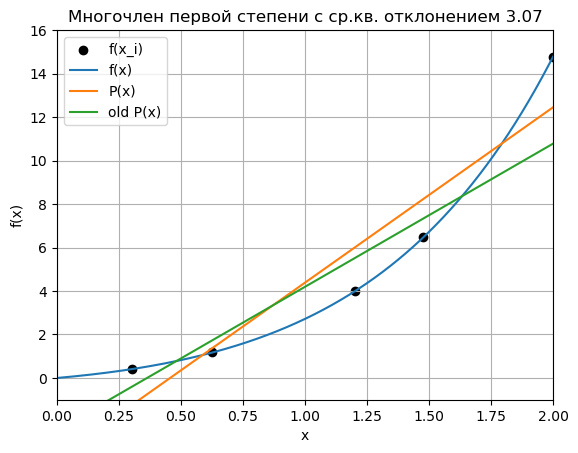

In [139]:
x = np.linspace(0, 2, 10000)
c2_d1 = c
fig, ax = plt.subplots()
ax.scatter(x_i, f(x_i), label='f(x_i)', color='black')
ax.plot(x, f(x), label='f(x)')
ax.plot(x, P(c2_d1, x), label='P(x)')
ax.plot(x, P(c1_d1, x), label='old P(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 16)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.title('Многочлен первой степени с ср.кв. отклонением ' + str(round(np.mean((f_i - P(c2_d1, x_i))**2), 2)))
plt.grid()
plt.show()

Проверим, что будет, если повысить количество точек:

In [161]:
def approx_plot_deg1(n_points=5):
    x = np.linspace(0, 2, 10000)
    x_i = np.sort(np.random.choice(x, n_points, replace=True))
    f_i = x_i*np.e**x_i

    a = np.array(
    [[np.dot(x_i**0, x_i**0), np.dot(x_i**0, x_i**1)],
     [np.dot(x_i**1, x_i**0), np.dot(x_i**1, x_i**1)]
    ])
    b = np.array(
    [np.dot(x_i**0, f_i), np.dot(x_i**1, f_i)])
    c = np.linalg.solve(a,b)
    
    x = np.linspace(0, 2, 10000)
    c2_d1 = c
    fig, ax = plt.subplots()
    ax.scatter(x_i, f(x_i), label='f(x_i)', color='black')
    ax.plot(x, f(x), label='f(x)')
    ax.plot(x, P(c2_d1, x), label='P(x)')
    ax.plot(x, P(c1_d1, x), label='old P(x)')
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 16)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.legend()
    plt.title('Многочлен первой степени с ср.кв. отклонением ' + str(round(np.mean((f_i - P(c2_d1, x_i))**2), 2)) + ' по ' +str(n_points) + ' точкам' )
    plt.grid()
    plt.show()
    
    return None

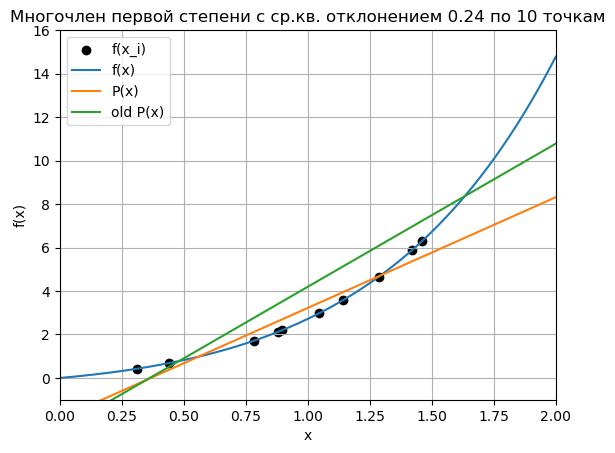

In [162]:
approx_plot_deg1(10)

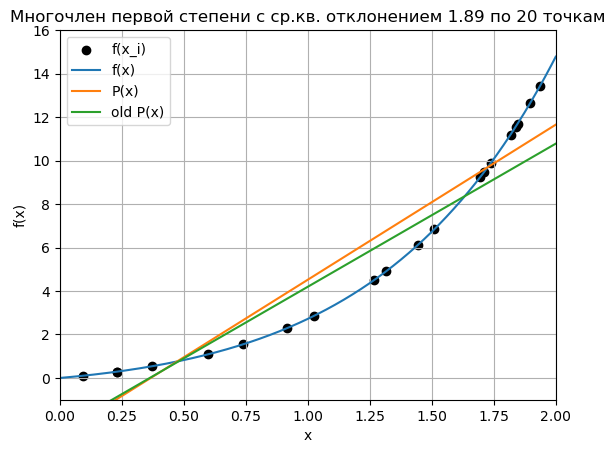

In [163]:
approx_plot_deg1(20)

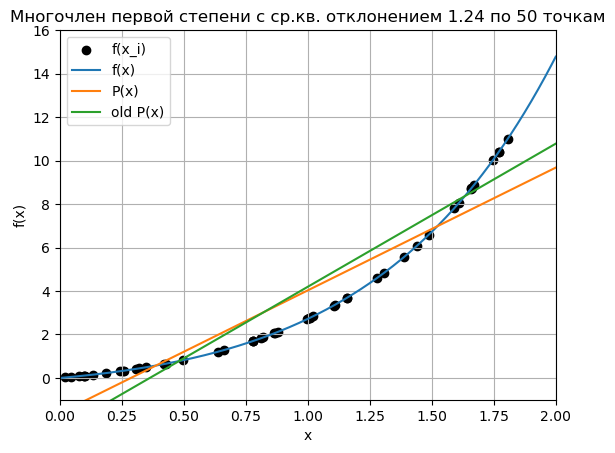

In [164]:
approx_plot_deg1(50)

Проделаем аналогичные действия для многочленов со степенями $2$ и $3$:

In [169]:
def approx_plot_deg2(n_points=5):
    x = np.linspace(0, 2, 10000)
    x_i = np.sort(np.random.choice(x, n_points, replace=True))
    f_i = x_i*np.e**x_i

    a = np.array(
    [[np.dot(x_i**0, x_i**0), np.dot(x_i**0, x_i**1), np.dot(x_i**0, x_i**2)],
     [np.dot(x_i**1, x_i**0), np.dot(x_i**1, x_i**1), np.dot(x_i**1, x_i**2)],
     [np.dot(x_i**2, x_i**0), np.dot(x_i**2, x_i**1), np.dot(x_i**2, x_i**2)]
    ])
    b = np.array(
    [np.dot(x_i**0, f_i), np.dot(x_i**1, f_i), np.dot(x_i**2, f_i)])
    c = np.linalg.solve(a,b)
    
    x = np.linspace(0, 2, 10000)
    c2_d2 = c
    fig, ax = plt.subplots()
    ax.scatter(x_i, f(x_i), label='f(x_i)', color='black')
    ax.plot(x, f(x), label='f(x)')
    ax.plot(x, P(c2_d2, x), label='P(x)')
    ax.plot(x, P(c1_d2, x), label='old P(x)')
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 16)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.legend()
    plt.title('Многочлен второй степени с ср.кв. отклонением ' + str(round(np.mean((f_i - P(c2_d2, x_i))**2), 3)) + ' по ' +str(n_points) + ' точкам' )
    plt.grid()
    plt.show()
    
    return None

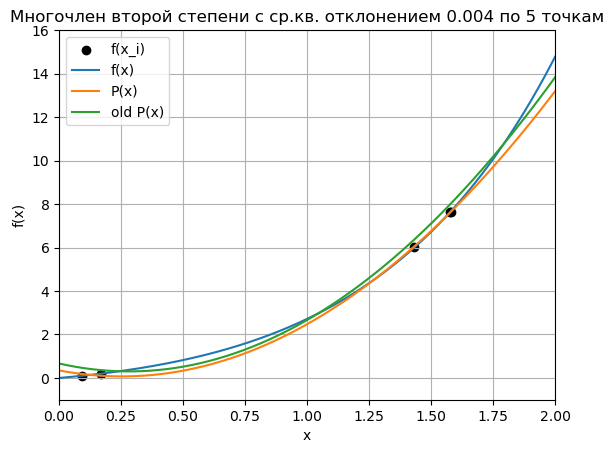

In [170]:
approx_plot_deg2()

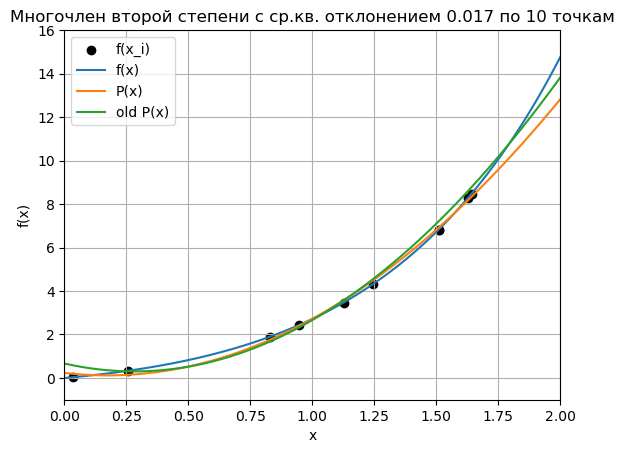

In [171]:
approx_plot_deg2(10)

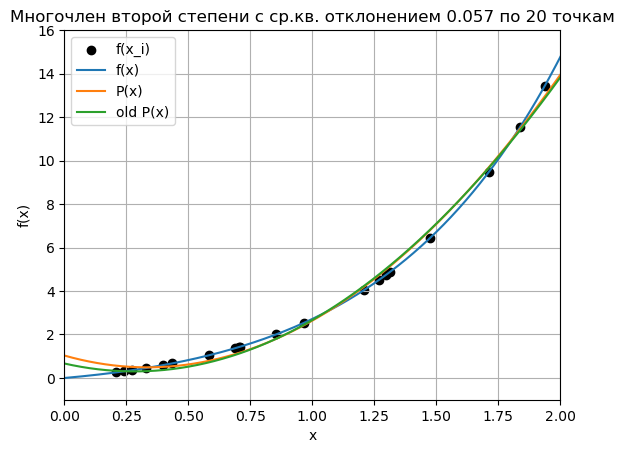

In [176]:
approx_plot_deg2(20)

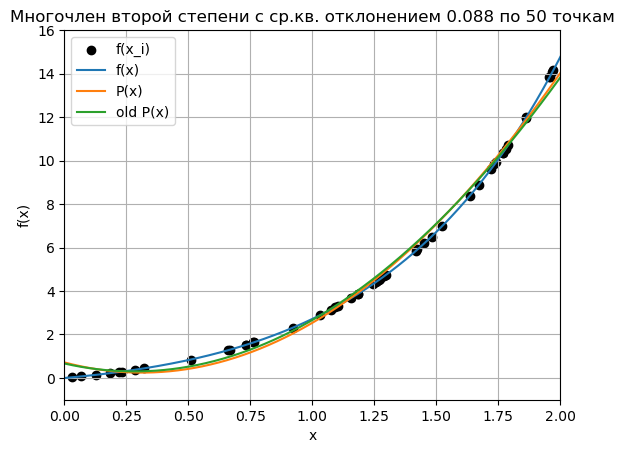

In [175]:
approx_plot_deg2(50)

In [184]:
def approx_plot_deg3(n_points=5):
    x = np.linspace(0, 2, 10000)
    x_i = np.sort(np.random.choice(x, n_points, replace=True))
    f_i = x_i*np.e**x_i

    a = np.array(
    [[np.dot(x_i**0, x_i**0), np.dot(x_i**0, x_i**1), np.dot(x_i**0, x_i**2), np.dot(x_i**0, x_i**3)],
     [np.dot(x_i**1, x_i**0), np.dot(x_i**1, x_i**1), np.dot(x_i**1, x_i**2), np.dot(x_i**1, x_i**3)],
     [np.dot(x_i**2, x_i**0), np.dot(x_i**2, x_i**1), np.dot(x_i**2, x_i**2), np.dot(x_i**2, x_i**3)],
     [np.dot(x_i**3, x_i**0), np.dot(x_i**3, x_i**1), np.dot(x_i**3, x_i**2), np.dot(x_i**3, x_i**3)],
    ])
    b = np.array(
    [np.dot(x_i**0, f_i), 
     np.dot(x_i**1, f_i), 
     np.dot(x_i**2, f_i), 
     np.dot(x_i**3, f_i)])
    c = np.linalg.solve(a,b)
    
    x = np.linspace(0, 2, 10000)
    c2_d3 = c
    fig, ax = plt.subplots()
    ax.scatter(x_i, f(x_i), label='f(x_i)', color='black')
    ax.plot(x, f(x), label='f(x)')
    ax.plot(x, P(c2_d3, x), label='P(x)')
    ax.plot(x, P(c1_d3, x), label='old P(x)')
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 16)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.legend()
    plt.title('Многочлен второй степени с ср.кв. отклонением ' + str(round(np.mean((f_i - P(c2_d3, x_i))**2), 4)) + ' по ' +str(n_points) + ' точкам' )
    plt.grid()
    plt.show()
    
    return None

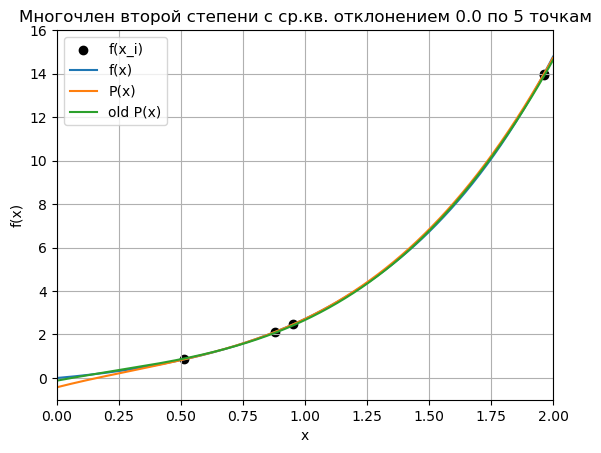

In [185]:
approx_plot_deg3()

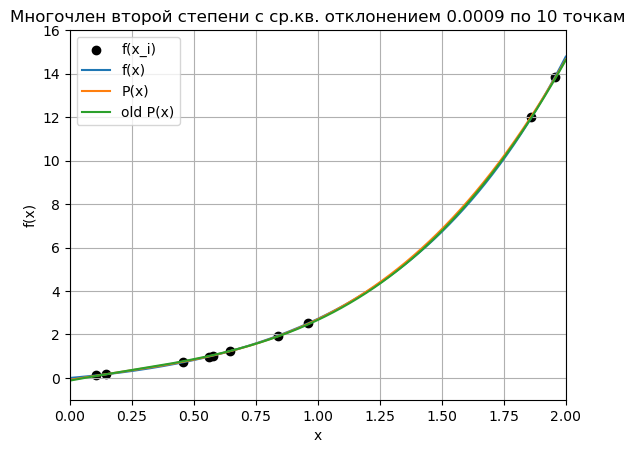

In [186]:
approx_plot_deg3(10)

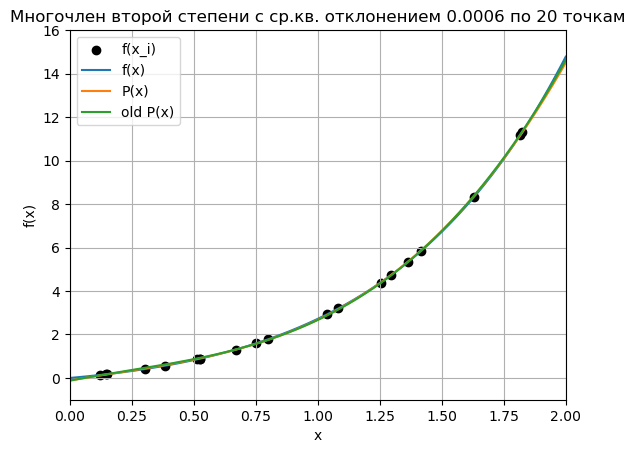

In [187]:
approx_plot_deg3(20)

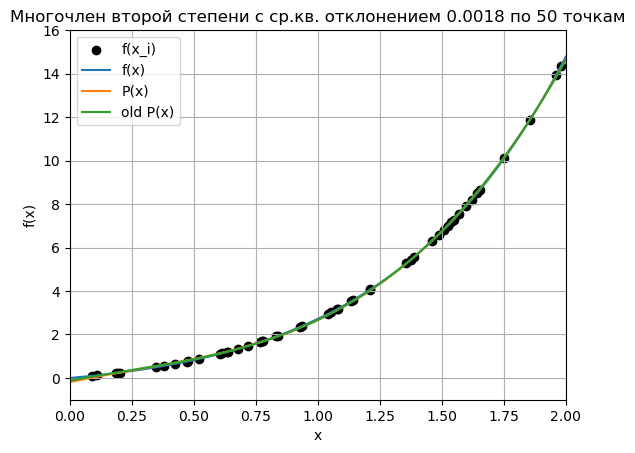

In [188]:
approx_plot_deg3(50)

# Вывод

С помощью метода минимизации среднеквадратичного отклонения мы смогли построить наилучше в среднеквадратичном смысле приближения исходной функции $f(x)$ для случаем, когда функция задана непрерывно и поточечно. Причем в обоих случаях приближения при достаточной погрешности хорошо описывают поведение исходной функции на заданном отрезке. Достигать нужной погрешности можно с помощью повышения степени приближающего многочлена, а в случае поточечно заданной функции - с помощью изменения числа точек, по которым строится приближающий многочлен.